In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['figure.dpi'] = 125

### Perturbing polynomials

Analyzing perturbed coefficients and roots of
$$p(x) = (x-1)(x-2)(x-3)(x-4)(x-5)(x-6)(x-7)(x-8)(x-9)(x-10)$$
Expanding, we have
$$p(x) = x^{10} - 55 x^9 + 1320 x^8 - 18150 x^7 + 157773 x^6 - 902055 x^5 + 3416930 x^4 - 8409500 x^3 + 12753576 x^2 - 10628640 x + 3628800$$
The roots are:

In [3]:
coeff = [1, -55, 1320, -18150, 157773, -902055, 3416930, -8409500, 12753576, -10628640, 3628800]
roots = np.roots(coeff)
print(roots)

[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


In [4]:
#a_exp = list(range(-10, 1, 0.5)) # consecutive numbers
a_exp = list(np.arange(-10, 1, 0.5)) # consecutive numbers
a_vals = [0] + list(map(lambda x:pow(10, x), a_exp))
print(a_vals)

[0, 1e-10, 3.1622776601683795e-10, 1e-09, 3.1622776601683795e-09, 1e-08, 3.162277660168379e-08, 1e-07, 3.162277660168379e-07, 1e-06, 3.162277660168379e-06, 1e-05, 3.1622776601683795e-05, 0.0001, 0.00031622776601683794, 0.001, 0.0031622776601683794, 0.01, 0.03162277660168379, 0.1, 0.31622776601683794, 1.0, 3.1622776601683795]


Perturbing coefficients

In [5]:
coeff_ck = coeff[1:]
print(coeff_ck)

[-55, 1320, -18150, 157773, -902055, 3416930, -8409500, 12753576, -10628640, 3628800]


In [6]:
def perturb_coeff(a, coeff):
    coeff_perturbed = []
    for c_k in coeff:
        e_k = np.random.normal(0, 1) # mu = 0, sigma = 1
        coeff_perturbed.append(c_k*(1 + a*e_k))
    return coeff_perturbed

def dist(coeff_ck, new_coeff_ck):
    return [i - j for i, j in zip(new_coeff_ck, coeff_ck)]

def roots_perturb_coeff(perturb_coeff):
    perturb_coeff_full = [1] + perturb_coeff
    return np.roots(perturb_coeff_full)

def real_roots(roots):
    return list(roots.real[abs(roots.imag)<1e-5])

In [7]:
# testing

example_a = 10
example_perturb_coeff = perturb_coeff(example_a, coeff_ck)
example_roots = roots_perturb_coeff(example_perturb_coeff)
example_real_roots = real_roots(example_roots)
print('perturbed coefficients:', example_perturb_coeff, '\n')
#print('all roots of perturbed polynomial:', example_roots, '\n')
print('real roots of perturbed polynomial:', example_real_roots)

perturbed coefficients: [429.9368712515161, 13443.255642243525, -235703.7822975627, -1980738.1811876427, 625193.3770237551, -5892986.773035933, 47796512.834744535, 8836684.397663027, 74121617.86772738, -6867995.775048606] 

real roots of perturbed polynomial: [-394.36531472381085, -45.907186465290486, 16.80250148635323, -7.36065722449376, 2.701714752355583, 0.09118380462356256]


### Plots

In [8]:
a_roots = []
for a in a_vals:
    trial_coeff = perturb_coeff(a, coeff_ck)
    trial_roots = roots_perturb_coeff(trial_coeff)
    trial_real_roots = real_roots(trial_roots)
    a_roots.append(trial_real_roots)

a_roots_df = pd.DataFrame(a_roots)
a_roots_df.insert(0, 'a', a_vals)
a_roots_df.insert(0, 'a_exp', [float('-inf')] + a_exp)
a_roots_df.insert(0, 'a_rounded', a_roots_df['a'].round(2))
print(a_roots_df.shape)
a_roots_df.head(10)

(23, 13)


,a_rounded,a_exp,a,0,1,2,3,4,5,6,7,8,9
0,0.0,-inf,0.000000e+00,10.000000,9.000000,8.000000,7.000000,6.000000,5.000000,4.000000,3.000000,2.000000,1.000000
1,0.0,-10.0,1.000000e-10,9.999978,9.000085,7.999872,7.000091,5.999977,4.999994,4.000005,2.999999,2.000000,1.000000
2,0.0,-9.5,3.162278e-10,9.999543,9.001775,7.997212,7.002241,5.999034,5.000215,3.999978,3.000001,2.000000,1.000000
3,0.0,-9.0,1.000000e-09,10.000133,8.999057,8.002647,6.996090,6.003294,4.998409,4.000421,2.999949,2.000001,1.000000
4,0.0,-8.5,3.162278e-09,9.999668,8.998509,8.009105,6.982907,6.015814,4.992019,4.002285,2.999673,2.000019,1.000000
5,0.0,-8.0,1.000000e-08,9.999922,8.997350,8.012586,6.975779,6.023765,4.987245,4.003894,2.999428,2.000031,1.000000
6,0.0,-7.5,3.162278e-08,10.011049,8.959323,8.048939,6.984994,5.984157,5.016451,3.994263,3.000882,1.999944,1.000002
7,0.0,-7.0,1.000000e-07,10.043215,8.771877,8.296883,6.815106,6.083914,4.989333,3.999374,3.000319,1.999976,1.000001
8,0.0,-6.5,3.162278e-07,10.195563,6.926947,3.914230,3.011562,1.999779,0.999990,NaN,NaN,NaN,NaN
9,0.0,-6.0,1.000000e-06,3.840738,3.007485,2.001027,0.999980,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
a_roots_df_melt = pd.melt(a_roots_df, id_vars=['a', 'a_exp', 'a_rounded'], var_name='roots', value_name='values')
a_roots_df_melt = a_roots_df_melt.sort_values(by=['a'])
print(a_roots_df_melt.shape)
a_roots_df_melt.head(10)

(230, 5)


,a,a_exp,a_rounded,roots,values
0,0.0,-inf,0.0,0,10.0
23,0.0,-inf,0.0,1,9.0
115,0.0,-inf,0.0,5,5.0
46,0.0,-inf,0.0,2,8.0
92,0.0,-inf,0.0,4,6.0
69,0.0,-inf,0.0,3,7.0
184,0.0,-inf,0.0,8,2.0
161,0.0,-inf,0.0,7,3.0
138,0.0,-inf,0.0,6,4.0
207,0.0,-inf,0.0,9,1.0


$a$ versus root values

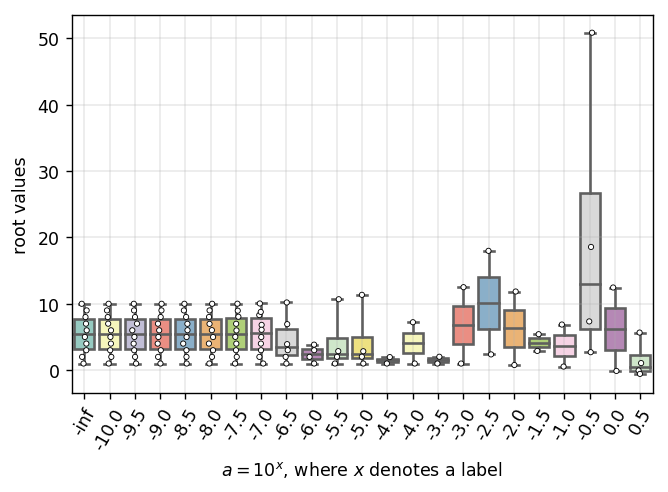

In [10]:
sns.stripplot(x='a_exp', y='values', data=a_roots_df_melt, size=3, color='white', linewidth=0.5, edgecolor='black')

#boxplot = sns.boxplot(x='a_rounded', y='values', data=a_roots_df_melt, whis=np.inf, palette='Set3')
boxplot = sns.boxplot(x='a_exp', y='values', data=a_roots_df_melt, whis=np.inf, palette='Set3')
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=60, horizontalalignment='center')
boxplot.set(xlabel='$a = 10^x$, where $x$ denotes a label')
boxplot.set(ylabel='root values')

plt.grid(linestyle='-', linewidth=0.25)
plt.show()

In [11]:
#a_roots_df_melt.head(100)